### Business goal:

Build a logistic regression model that would help in predicting the customers who would be retained.

In [2]:
import pandas as pd
raw_df = pd.read_excel("D:\Business Analytics\Important files\Logistical regression\insurance.xlsx")

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PolID                      2000 non-null   int64  
 1   gender                     2000 non-null   int64  
 2   Age_client                 2000 non-null   int64  
 3   age_of_car_M               2000 non-null   int64  
 4   Client_Seniority           2000 non-null   float64
 5   Insuredcapital_content_re  2000 non-null   float64
 6   num_policiesC              2000 non-null   int64  
 7   metro_code                 2000 non-null   int64  
 8   apartment                  2000 non-null   int64  
 9   Retention                  2000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 156.4 KB


In [4]:
raw_df.head(3)

,PolID,gender,Age_client,age_of_car_M,Client_Seniority,Insuredcapital_content_re,num_policiesC,metro_code,apartment,Retention
0,54,1,71,14,12.84330,9.77588,1,0,1,1
1,93,1,73,12,7.57016,11.59110,1,1,0,0
2,222,1,53,0,10.52430,10.48590,0,1,1,1


In [5]:
##---------------------------------------
## Identify the Class label or Y variable
##---------------------------------------
Y = raw_df.Retention.astype('category')
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: Retention
Non-Null Count  Dtype   
--------------  -----   
2000 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None


In [6]:
raw_df.Retention

0       1
1       0
2       1
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: Retention, Length: 2000, dtype: int64

In [7]:
##-----------------------------
## Select the Predictor Variables into list called X_features
##------------------------------
X_features = list(raw_df.columns)
# risk is the outcome or Y variable in this step , we are identifying the X variables
X_features.remove('PolID')
X_features.remove('Retention')

In [8]:
print(X_features)

['gender', 'Age_client', 'age_of_car_M', 'Client_Seniority', 'Insuredcapital_content_re', 'num_policiesC', 'metro_code', 'apartment']


In [9]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]

In [10]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 1400 entries, 958 to 858
Series name: Retention
Non-Null Count  Dtype   
--------------  -----   
1400 non-null   category
dtypes: category(1)
memory usage: 12.4 KB
None


In [11]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['gender','num_policiesC','metro_code','apartment']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [12]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 958 to 858
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age_client                 1400 non-null   int64  
 1   age_of_car_M               1400 non-null   int64  
 2   Client_Seniority           1400 non-null   float64
 3   Insuredcapital_content_re  1400 non-null   float64
 4   gender_1                   1400 non-null   int32  
 5   num_policiesC_1            1400 non-null   int32  
 6   metro_code_1               1400 non-null   int32  
 7   apartment_1                1400 non-null   int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 76.6 KB


In [13]:
X_train_encoded.head()

,Age_client,age_of_car_M,Client_Seniority,Insuredcapital_content_re,gender_1,num_policiesC_1,metro_code_1,apartment_1
958,55,10,6.14921,10.1329,1,1,0,1
1313,76,12,5.38809,11.3100,0,1,0,0
330,51,0,12.05750,10.4334,0,1,0,0
1923,82,16,11.35390,10.0437,1,1,1,1
760,56,10,15.44420,10.4458,1,0,1,1


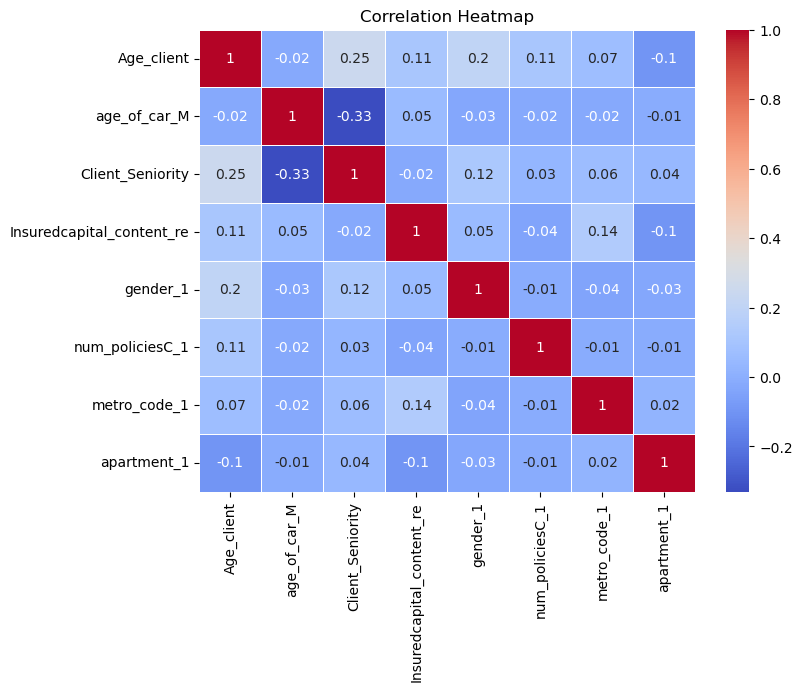

In [14]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### No highly correlated X-variables were observed.

In [16]:
corr_matrix.round(2)

,Age_client,age_of_car_M,Client_Seniority,Insuredcapital_content_re,gender_1,num_policiesC_1,metro_code_1,apartment_1
Age_client,1.00,-0.02,0.25,0.11,0.20,0.11,0.07,-0.10
age_of_car_M,-0.02,1.00,-0.33,0.05,-0.03,-0.02,-0.02,-0.01
Client_Seniority,0.25,-0.33,1.00,-0.02,0.12,0.03,0.06,0.04
Insuredcapital_content_re,0.11,0.05,-0.02,1.00,0.05,-0.04,0.14,-0.10
gender_1,0.20,-0.03,0.12,0.05,1.00,-0.01,-0.04,-0.03
num_policiesC_1,0.11,-0.02,0.03,-0.04,-0.01,1.00,-0.01,-0.01
metro_code_1,0.07,-0.02,0.06,0.14,-0.04,-0.01,1.00,0.02
apartment_1,-0.10,-0.01,0.04,-0.10,-0.03,-0.01,0.02,1.00


In [17]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.669899
         Iterations 4
                             Results: Logit
Model:                  Logit              Method:             MLE       
Dependent Variable:     Retention          Pseudo R-squared:   0.033     
Date:                   2024-10-09 11:56   AIC:                1893.7185 
No. Observations:       1400               BIC:                1940.9165 
Df Model:               8                  Log-Likelihood:     -937.86   
Df Residuals:           1391               LL-Null:            -970.35   
Converged:              1.0000             LLR p-value:        4.8464e-11
No. Iterations:         4.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                     -0.5343   0.83

#### Significant values identified: Age_client, age_of_car_M, Client_Seniority, num_policiesC_1.

In [19]:
#Only significant X-vars are used to build the predictive model.
#Select the significant variables
significant_vars = ['Age_client','age_of_car_M', 'Client_Seniority', 'num_policiesC_1']
print(significant_vars)

['Age_client', 'age_of_car_M', 'Client_Seniority', 'num_policiesC_1']


In [20]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
X_train_encoded = sm.add_constant(X_train_encoded)
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.682161
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Retention        Pseudo R-squared: 0.016     
Date:               2024-10-09 11:56 AIC:              1918.0522 
No. Observations:   1400             BIC:              1939.0291 
Df Model:           3                Log-Likelihood:   -955.03   
Df Residuals:       1396             LL-Null:          -970.35   
Converged:          1.0000           LLR p-value:      1.0038e-06
No. Iterations:     4.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age_client         0.0056   0.0032  1.7678 0.0771 -0.0006  0.0117
age_of_car_M       0.0236   0.0089  2.6442 0.0082  0.0061  0.0410


#### Retraining of the model is required as significant X-variables identified are: age_of_car_M and num_policiesC_1.

In [22]:
#Only significant X-vars are used to build the predictive model.
#Select the significant variables
significant_vars = ['age_of_car_M', 'num_policiesC_1']
print(significant_vars)

##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
X_train_encoded = sm.add_constant(X_train_encoded)
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

['age_of_car_M', 'num_policiesC_1']
Optimization terminated successfully.
         Current function value: 0.685908
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Retention        Pseudo R-squared: 0.010     
Date:               2024-10-09 11:56 AIC:              1924.5424 
No. Observations:   1400             BIC:              1935.0308 
Df Model:           1                Log-Likelihood:   -960.27   
Df Residuals:       1398             LL-Null:          -970.35   
Converged:          1.0000           LLR p-value:      7.0971e-06
No. Iterations:     4.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age_of_car_M       0.0331   0.0078  4.2551 0.0000  0.0179  0.0484
num_policiesC_1   -0.3567   0.

In [23]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [24]:
y_prob

83      0.500000
885     0.460606
1725    0.468849
660     0.557730
1776    0.477109
          ...   
1016    0.565887
1035    0.551466
1134    0.501945
1831    0.516562
1631    0.460606
Length: 600, dtype: float64

In [25]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})

In [26]:
print(y_pred_df.head())

     actual_Y  predicted_prob
83          1        0.500000
885         0        0.460606
1725        1        0.468849
660         0        0.557730
1776        1        0.477109


In [27]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
83          1        0.500000            1
885         0        0.460606            0
1725        1        0.468849            0
660         0        0.557730            1
1776        1        0.477109            0


In [28]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[179 115]
 [139 167]]


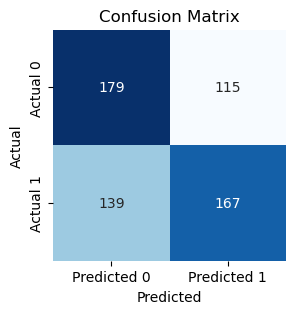

In [29]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.55
Accuracy: 0.58


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       294
           1       0.59      0.55      0.57       306

    accuracy                           0.58       600
   macro avg       0.58      0.58      0.58       600
weighted avg       0.58      0.58      0.58       600



In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)

In [33]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           1.000000
1        0.11           1.000000
2        0.12           1.000000
3        0.13           1.000000
4        0.14           1.000000
5        0.15           1.000000
6        0.16           1.000000
7        0.17           1.000000
8        0.18           1.000000
9        0.19           1.000000
10       0.20           1.000000
11       0.21           1.000000
12       0.22           1.000000
13       0.23           1.000000
14       0.24           1.000000
15       0.25           1.000000
16       0.26           1.000000
17       0.27           1.000000
18       0.28           1.000000
19       0.29           1.000000
20       0.30           1.000000
21       0.31           1.000000
22       0.32           1.000000
23       0.33           1.000000
24       0.34           1.000000
25       0.35           1.000000
26       0.36           1.000000
27       0.37           1.000000
28       0.38           1.000000
29       0

### Business decision:

Select a threshold value of 0.42 for a higher sensistivity.